# 1. Load Data sets
##  1.1 Importing Libraries and Modules

In [2]:
import warnings 
warnings.filterwarnings("ignore")
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np 
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


In [3]:
filename = '/Users/apple/Desktop/insurance.csv'

df = pd.read_csv(filename)


# 2. Preprocess Datasets
 The values of the columns cannot contain zero values. If exist we need to replace it by 0



In [4]:
#replace missing value as 0
df[[]]=df[[]].replace(0, np.NaN)
print(df.isnull().sum())


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [5]:
sex_encoded =   pd.Categorical(df.sex).codes 
le = preprocessing.LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
print(sex_encoded[0:6])

[1 0 0 0 1 1]


In [6]:
df['age_bins'] = pd.cut(x=df['age'], bins=[17,35,55,65])

df.age_bins = pd.Categorical(df.age_bins)
df['age_bins'] = df.age_bins.cat.codes



In [7]:

df.smoker = pd.Categorical(df.smoker)
df['smoker'] = df.smoker.cat.codes

In [8]:
df.region = pd.Categorical(df.region)
df['region'] = df.region.cat.codes

# 3. Perform Exploratory Data Analysis on Dataset

In [9]:
print(df.shape)
print(df.dtypes)

(1338, 8)
age           int64
sex           int64
bmi         float64
children      int64
smoker         int8
region         int8
charges     float64
age_bins       int8
dtype: object


In [10]:
print(df.groupby('age_bins').size())

age_bins
0    574
1    548
2    216
dtype: int64


In [11]:
print(df.head(20))
print(df.describe())

    age  sex     bmi  children  smoker  region       charges  age_bins
0    18    1  34.100         0       0       2   1137.011000         0
1    18    0  26.315         0       0       0   2198.189850         0
2    18    0  35.625         0       0       0   2211.130750         0
3    18    0  30.115         0       0       0  21344.846700         0
4    18    1  23.750         0       0       0   1705.624500         0
5    18    1  25.175         0       1       0  15518.180250         0
6    18    0  36.850         0       1       2  36149.483500         0
7    18    1  15.960         0       0       0   1694.796400         0
8    18    0  38.280         0       0       2   1631.821200         0
9    18    1  34.430         0       0       2   1137.469700         0
10   18    0  26.730         0       0       2   1615.766700         0
11   18    1  22.990         0       0       0   1704.568100         0
12   18    0  38.280         0       0       2  14133.037750         0
13   1

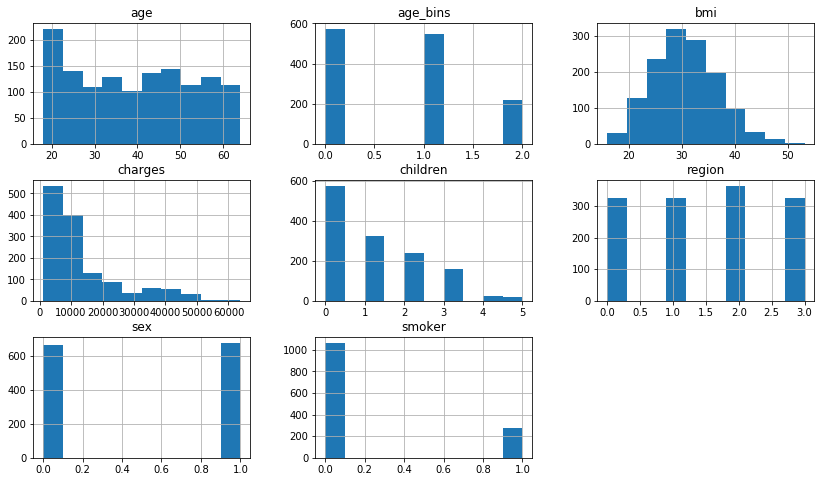

In [12]:
df.hist(figsize=(14,8))
plt.show()


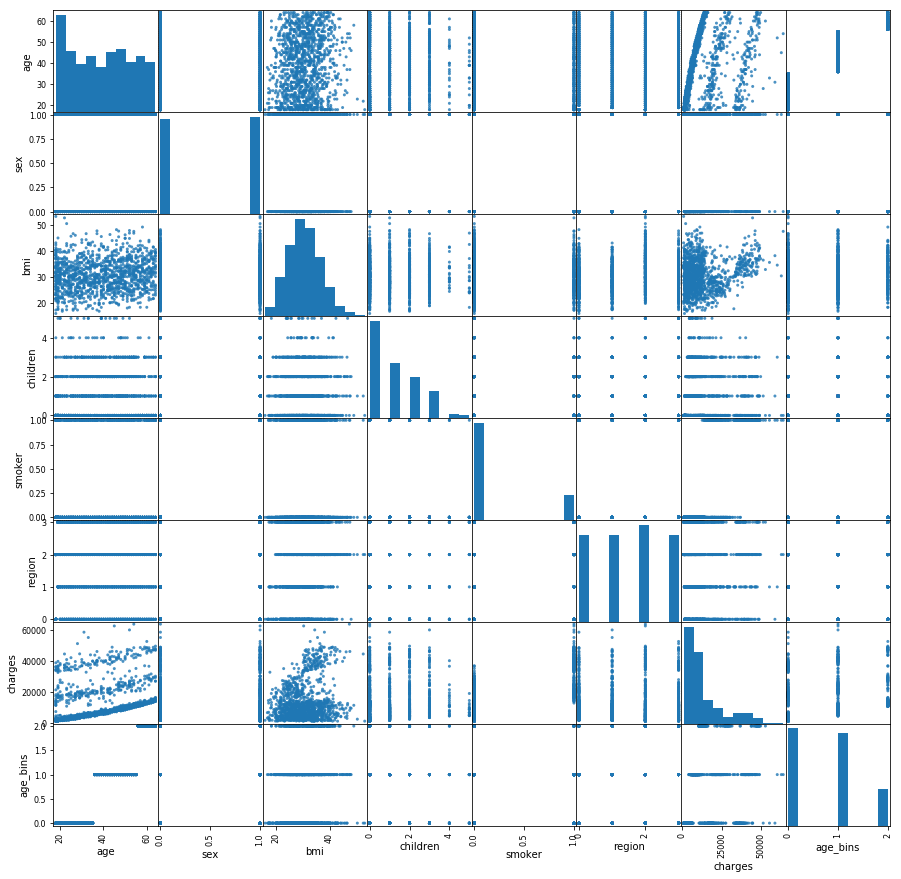

In [13]:
scatter_matrix(df,alpha=0.8,figsize=(15,15))
plt.show()

# 4 i) Age Analysis
## a) Is there a relationship between BMI and Age?


pandas.core.series.Series

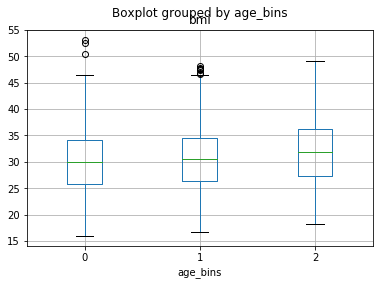

In [14]:
boxplot = df.boxplot(column=['bmi'], by='age_bins', return_type='axes')
type(boxplot)

#  b) Who got charged more on Average by Age

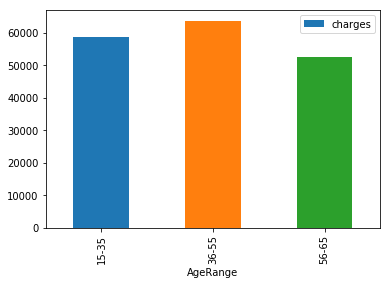

In [19]:


bins = [15, 35, 55]
names = ['15-35', '36-55', '56-65']
d = dict(enumerate(names, 1))
df['AgeRange'] = np.vectorize(d.get)(np.digitize(df['age'], bins))

idx = df.groupby(['AgeRange'])['charges'].transform(max) == df['charges']
final=df[idx]
final.plot(kind='bar',x='AgeRange',y='charges')
    

pandas.core.series.Series

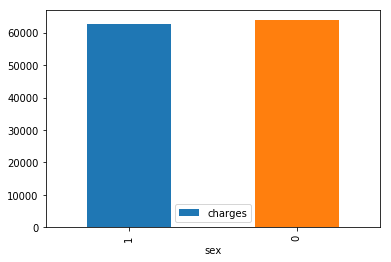

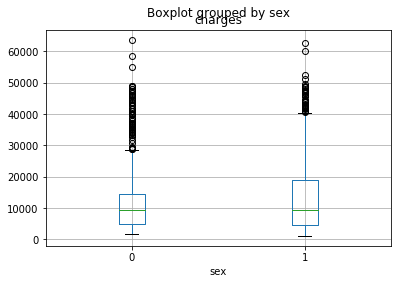

In [21]:


idx = df.groupby(['sex'])['charges'].transform(max) == df['charges']
final=df[idx]
final.plot(kind='bar',x='sex',y='charges')

boxplot = df.boxplot(column=['charges'], by='sex', return_type='axes')
type(boxplot)
    

# 4 ii) Weight Analysis

In [22]:
lst = [df]

for col in lst:
    col.loc[col["bmi"] < 18.5, "weight_condition"] = "Underweight"
    col.loc[(col["bmi"] >= 18.5) & (col["bmi"] < 24.986), "weight_condition"] = "Normal Weight"
    col.loc[(col["bmi"] >= 25) & (col["bmi"] < 29.926), "weight_condition"] = "Overweight"
    col.loc[col["bmi"] >= 30, "weight_condition"] = "Obese"
    
df.head(5)



,age,sex,bmi,children,smoker,region,charges,age_bins,AgeRange,weight_condition
0,18,1,34.100,0,0,2,1137.01100,0,15-35,Obese
1,18,0,26.315,0,0,0,2198.18985,0,15-35,Overweight
2,18,0,35.625,0,0,0,2211.13075,0,15-35,Obese
3,18,0,30.115,0,0,0,21344.84670,0,15-35,Obese
4,18,1,23.750,0,0,0,1705.62450,0,15-35,Normal Weight


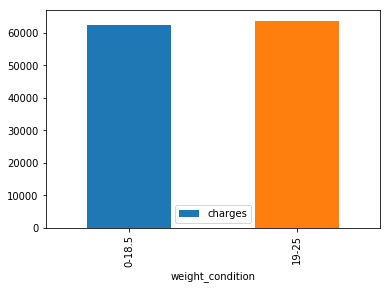

In [23]:

names = ['0-18.5', '19-25', '26-30','>30']
d = dict(enumerate(names, 1))
df['weight_condition'] = np.vectorize(d.get)(np.digitize(df['bmi'], bins))

idx = df.groupby(['weight_condition'])['charges'].transform(max) == df['charges']
final=df[idx]
final.plot(kind='bar',x='weight_condition',y='charges')

# 5 .Separate the dataset into the input and output NumPy arrays

In [26]:
#store data frame values into a numpy array
array = df.values
#seperate array into input and output; for x(input)=[:,1:8] and y[output]=[:,8]

X= array[:,0:6]
Y= array[:,6]


# 6. Split the input/output arrays into the training/testing datasets

In [27]:
#split dataset into tarining and testing

test_size= 0.30
seed= 7
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=test_size,random_state=seed)

#  7. Build and Train the Model

In [28]:
#building a model
model= LinearRegression()

model.fit(X_train,Y_train)

print(model.intercept_)
print(model.coef_)

-12083.147113497293
[ 2.52478168e+02  1.93564126e+01  3.56664885e+02  4.90631588e+02
  2.39453320e+04 -4.78714538e+02]


In [29]:
#building a model
model= DecisionTreeRegressor()

model.fit(X_train,Y_train)


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

# 8. Calculate R-Squared

In [30]:
#calculate R-Squared
R_squared=model.score(X_test,Y_test)
print(R_squared)

0.7356051678277162


In [31]:
#calculate R-Squared
R_squared=model.score(X_test,Y_test)
print(R_squared)

0.7356051678277162


# 9. Predict the medical charges
 ## Record 1

age :          48  

sex :          0   (Female)

bmi :          28    (Overweight)

children :     2    

smoker :       0    (No)

region :       2   (Southeast)

In [32]:
#predict model for Record 1
model.predict([[48,0,28,2,0,2]])

array([8978.1851])

For record 1 the predicted medical charge is $8539.671


 ## Record 2

age :          32 

sex :         1  (Male)

bmi :          33    (Obese)

children :     0    

smoker :       1   (Yes)

region :       3   (Southwest)

In [33]:
#predict model for Record 2
model.predict([[32,1,33,0,1,3]])

array([35491.64])

For record 2 the predicted medical charge is $35,491.64

## Record 3
age : 19

sex : 1 (Female)

bmi : 21 (Normal weight)

children : 0

smoker : 0 (No)

region : 0 (Northeast)

In [34]:
#predict model for Record 2
model.predict([[19,1,21,0,0,0]])

array([1704.5681])

For record 3 the predicted medical charge is $1704.57